<a href="https://www.kaggle.com/code/premkumarsanamala/image-captioning-generator?scriptVersionId=180901487" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **📸Image Caption Generator**
---  


### **Multi-Modality in Image Captioning**

#### **1. Visual Modality (Image Processing):**
   - **Feature Extraction:** The first step involves processing the image to extract meaningful features. This is typically done using Convolutional Neural Networks (CNNs) like VGGNet, ResNet, or more advanced models such as EfficientNet.
   - **Object Detection and Localization:** Advanced image captioning models might also use object detection techniques to identify and localize objects within the image.

#### **2. Textual Modality (Natural Language Processing):**
   - **Sequence Generation:** The second step involves generating a sequence of words to form a coherent sentence or description based on the extracted image features. This is typically done using Recurrent Neural Networks (RNNs), Long Short-Term Memory networks (LSTMs), or Transformer models.

### **How Image Captioning Works**

#### **1. Image Feature Extraction:**
   - The input image is passed through a pre-trained CNN to extract a fixed-size feature vector or a set of feature maps. This feature vector represents high-level information about the image's content.


#### **2. Sequence Generation (Captioning):**
   - The extracted image features are used as the initial input to an RNN or an LSTM network, which generates a caption word-by-word. The network is trained to predict the next word in the sequence given the current word and the image features.

## **Flow of the Project**
### **1. Load data**
- The data set used in the project is a readily available dataset on kaggle. 
- **Source:** https://www.kaggle.com/datasets/adityajn105/flickr8k 
- This dataset contains 8k images and each image again contains 5 captions. 
- The model contains two sperate networks one CNN for extracting features from images 
- The other is an LSTM network to extract text features. 

### **2. Data Preprocessing**

#### **Image Data**
- We first import VGG16 model which is an object detection model which can detect 1000 different objects. 
- To learn more about the architecture of VGG16 visit https://www.geeksforgeeks.org/vgg-16-cnn-model/. 
- We load each image, reshape it, preprocesses it and pass it to the VGG16 model to extract features and save them in a dictionary.  

#### **Text Data**
- We read the text file with captions, we create a dictionary with image id and its captions by splitting and joining the captions from source.  
- Next we perform text preprocessing where we remove the special charecters, spaces and add start and end tags to the captions. 
- Using tokenizer we create the word index for all the caption data and also find the max length of the caption. 

### **3. Model Building** 
- The model we build is has a Dense layer to collect the image features and another layer with embeddings to process captions.
- The both layers are connected to another dense layer which process the both outputs of the bove mentioned layers together and give output the caption. 

### **4. Model Training**
- We create a function to generate data by pairing the image features and text tokens using text to sequences. 
- We fix for number of epochs and generate data by running aloop and pass it to the model we build and train the model. 

### **5. Prediction & Evaluation** 
- We create a function to predict sequence since we need to generate a caption with a bunch of words we need to run the prediction for number of times until the model predicts a end tag and we print the caption as predicted caption by the model for give image. 
- We predict the caption and compare it with the actual caption and using a metric called BLEU we measure the score the better the score we get better predictions. 

### **6. Hyper Parameter tuning**
- We increase the number of epochs and train the model for more number of epochs and retrain the model and check 

### **7. Visualizing the final Result**
- We can plot the image and print the predicted caption and original caption to check how well the model is performing. 

### Methods Utilized



## 00 | Importing Modules

In [2]:

import os 
import pickle 
import numpy as np
from tqdm.notebook import tqdm 


from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model 
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add
from nltk.translate.bleu_score import corpus_bleu

from PIL import Image
import matplotlib.pyplot as plt



In [3]:
BASE_DIR = '/kaggle/input/flickr8k'
WORKING_DIR = '/kaggle/working'

## 01 | Extract Features

In [4]:
# Initialize model VGG16()
model  = VGG16()

# Restructure the model 
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

# Summarize the model 
print(model.summary())

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

None


In [5]:
# Extract feature from images
features = {}

directory  = os.path.join(BASE_DIR,'Images')

for image_name in tqdm(os.listdir(directory)):
    # create image path 
    img_dir = directory + '/' + image_name
    # Load image
    image = load_img(img_dir,target_size=(224,224))
    # Convert the image in to an array
    image = img_to_array(image)
    # Reshape the data for model input
    image = image.reshape((1,image.shape[0],image.shape[1],image.shape[2]))
    # Preprocess the image 
    image = preprocess_input(image)
    # Get features
    feature = model.predict(image,verbose=0)
    # get image id 
    image_id = image_name.split('.')[0]
    # store feature
    features[image_id] = feature

  0%|          | 0/8091 [00:00<?, ?it/s]

I0000 00:00:1717069829.513705     109 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [6]:
# Store features in pickle 
pickle.dump(features,open(os.path.join(WORKING_DIR,'features.pkl'),'wb'))

In [8]:
# load features from pickle
with open(os.path.join(WORKING_DIR,'features.pkl'),'rb') as f:
    features = pickle.load(f)

## 02 | Load the captions data

In [9]:
with open(os.path.join(BASE_DIR,'captions.txt'),'r') as f:
    next(f)
    captions_doc = f.read()

In [10]:
# Create mapping for image to caption
mapping = {}

# iterate thorugh each caption
for line in tqdm(captions_doc.split('\n')):
    tokens = line.split(',')
    if len(tokens)<2:
        continue
    image_id, caption = tokens[0],tokens[1:]
    # remove .jpg 
    image_id = image_id.split('.')[0]
    # convert caption list to string 
    caption = ' '.join(caption)
    # create list if needed
    if image_id not in mapping:
        mapping[image_id] = []
    mapping[image_id].append(caption)
    

  0%|          | 0/40456 [00:00<?, ?it/s]

## 03 | Text Preprocessing

In [11]:
def cleaning(mapping):
    for image_id, captions in mapping.items():
        for i in range(len(captions)):
            caption = captions[i]
            # Lowwer case
            caption = caption.lower()
            # Replace sepcial chars
            caption = caption.replace("[^A-Za-Z]","")
            # Replace multiple spaces with single pace
            caption = caption.replace('\s+',' ')
            # adding start and end tages to the caption
            caption = 'startseq ' + ' '.join([word for word in caption.split(' ') if len(word)>1]) + ' endseq'
            captions[i] = caption

In [14]:
mapping['1000268201_693b08cb0e']

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq']

In [13]:
# Caption preprocessing 
cleaning(mapping)

In [15]:
# get a list of all captions
all_captions = []
for key in mapping:
    for caption in mapping[key]:
        all_captions.append(caption)

In [16]:
# tokenize the captions list 
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index) + 1

In [17]:
# get max_lentgh 
max_length = max(len(caption.split()) for caption in all_captions)
max_length

35

## Train Test Split

In [18]:
image_ids = list(mapping.keys())
split_size = int(len(image_ids)*0.9)
train = image_ids[:split_size]
test = image_ids[split_size:]

In [19]:
# Create a data generator to get data in batch (to avoid session crash)
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    X1, X2, y = list(), list(), list()
    n = 0
    while True:
        for key in data_keys:
            n+=1
            captions = mapping[key]
            # process each caption 
            for caption in captions:
                # encode the sequence 
                seq = tokenizer.texts_to_sequences([caption])[0]
                for i in range(1,len(seq)):
                    in_seq, out_seq = seq[:i],seq[i]
                    # pad input sequence
                    in_seq = pad_sequences([in_seq],maxlen=max_length)[0]
                    # encode output sequence
                    out_seq = to_categorical([out_seq],num_classes=vocab_size)[0]
                    
                    # store the sequences
                    X1.append(features[key][0])
                    X2.append(in_seq)
                    y.append(out_seq)
            if n==batch_size:
                X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                yield {"image": X1, "text": X2}, y
                X1, X2, y = list(), list(), list()
                n = 0

## Model Creation

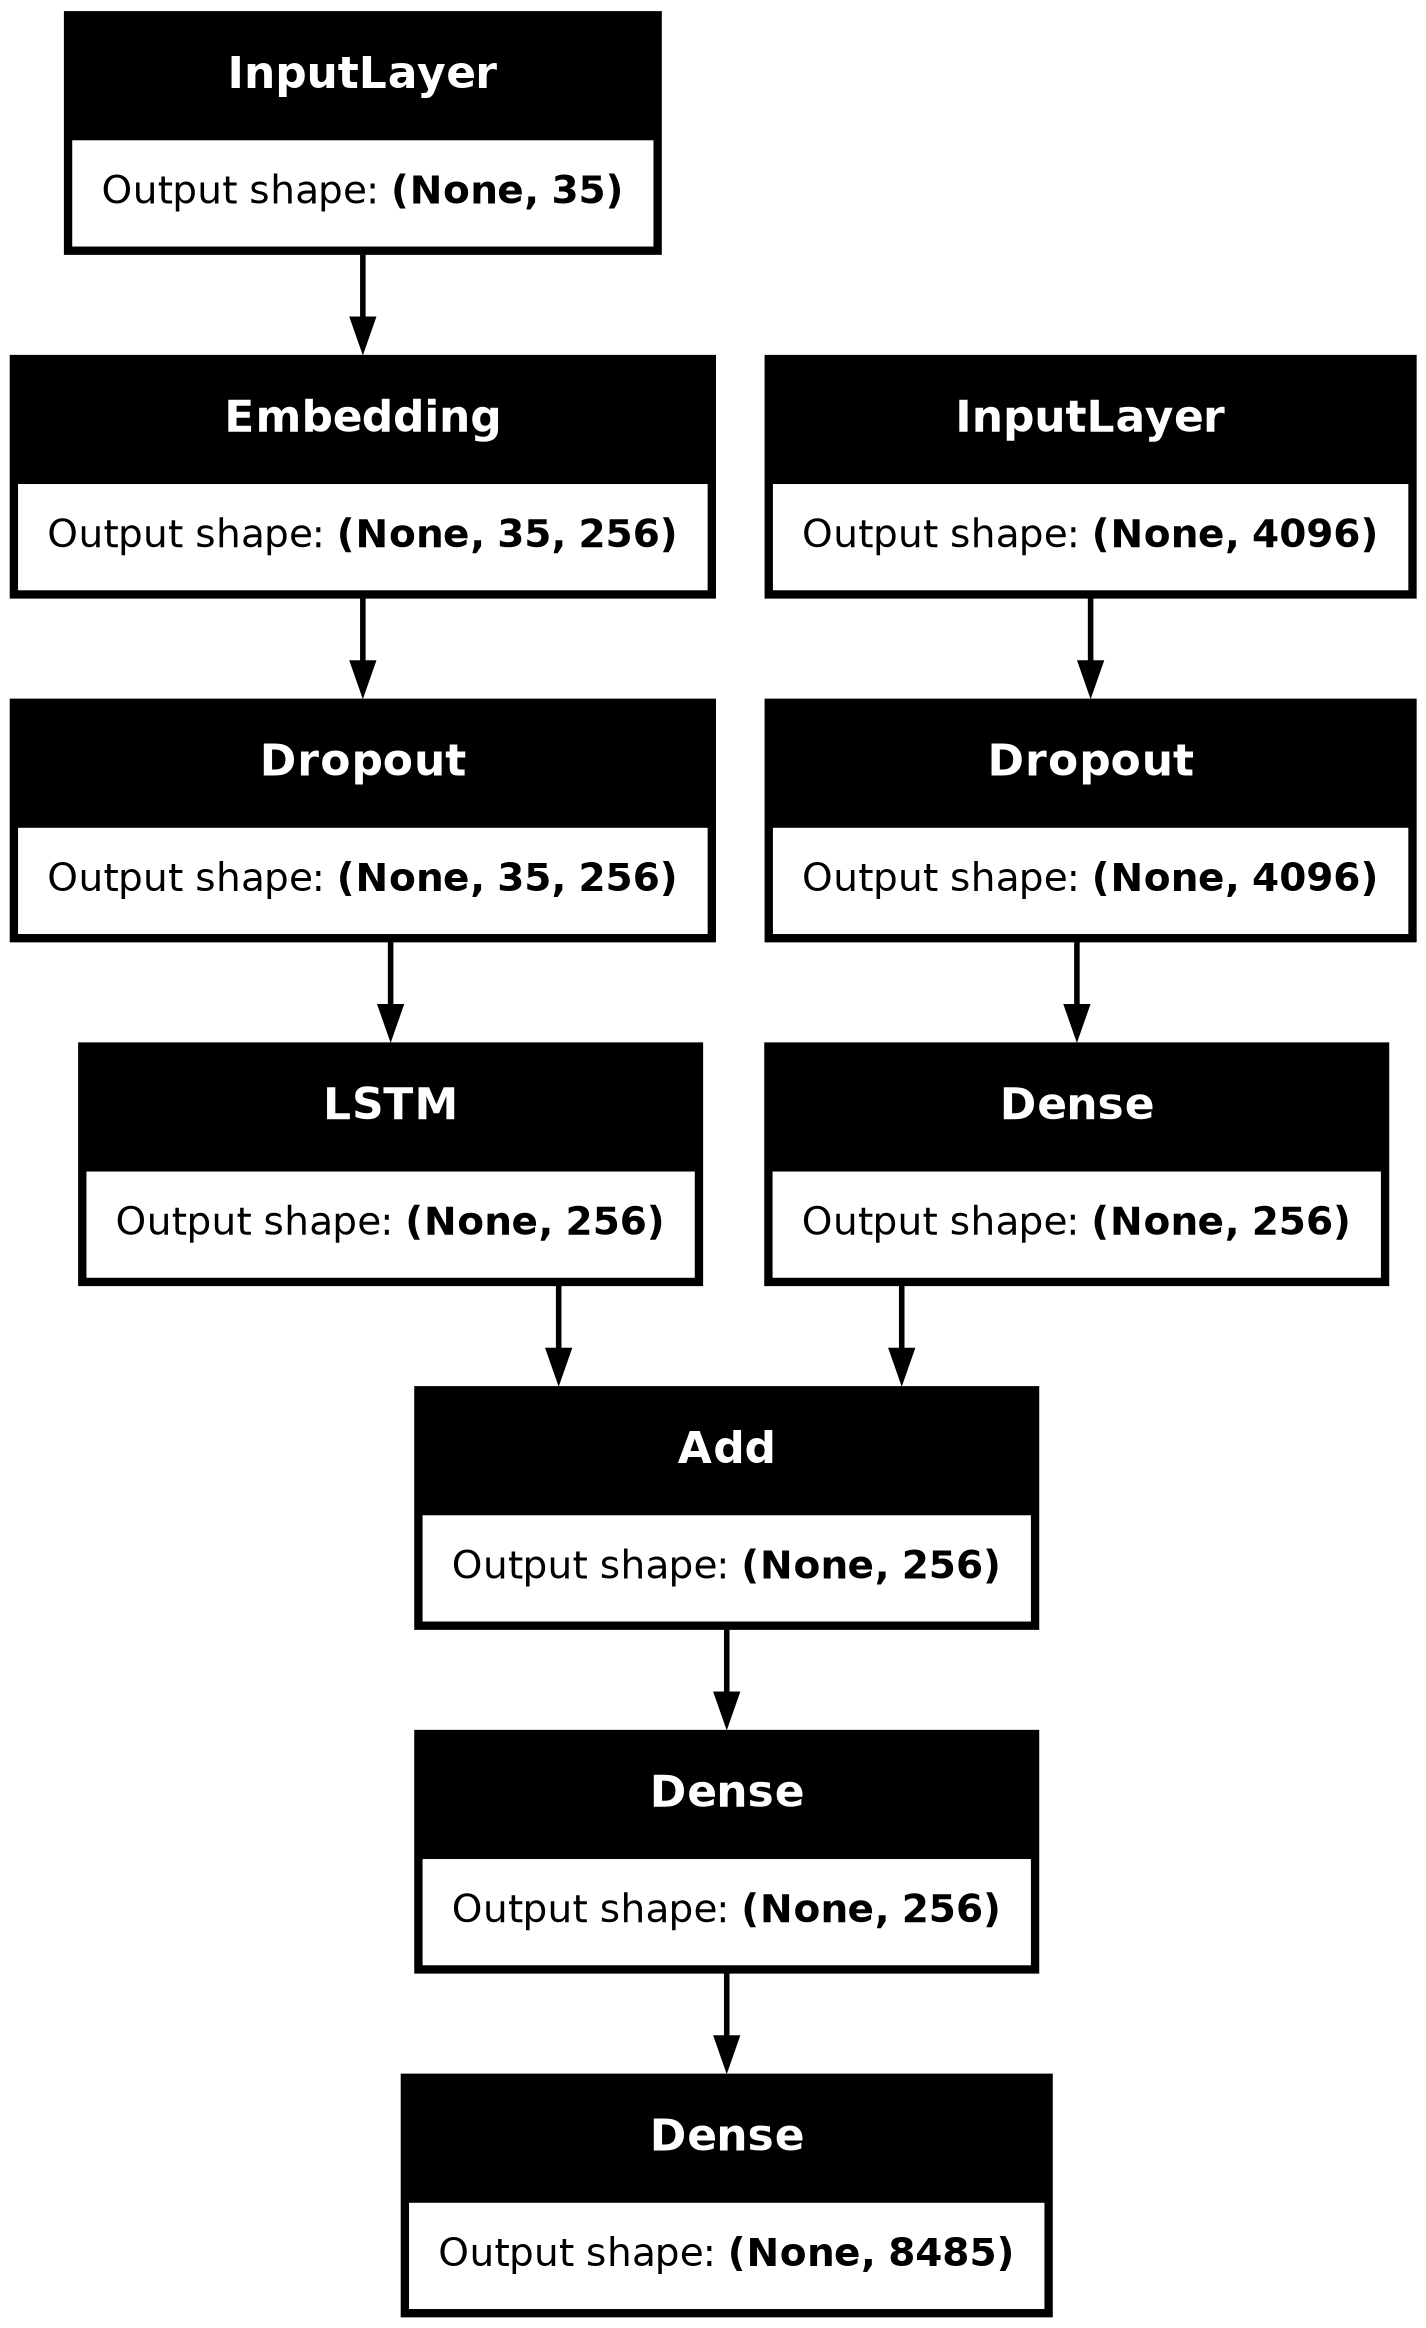

In [20]:
# Encoder model 
# image feature encoding layer
inputs1 = Input(shape=(4096,), name = 'image')
fe1     = Dropout(0.4)(inputs1)
fe2     = Dense(256, activation='relu')(fe1)

# Text encoding layer
inputs2 = Input(shape=(max_length,), name='text')
se1     = Embedding(vocab_size, 256,mask_zero=False)(inputs2)
se2     = Dropout(0.4)(se1)
se3     = LSTM(256)(se2)


# Decoder layer
decoder1 = add([fe2,se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs  = Dense(vocab_size, activation='softmax')(decoder2)

# model 
model = Model(inputs=[inputs1, inputs2],outputs=outputs)
model.compile(loss='categorical_crossentropy',optimizer='adam')

# plot model 
plot_model(model,show_shapes= True)


In [ ]:
epochs = 30
batch_size = 64
steps = len(train) // batch_size

for i in range(epochs):
    # create data generator 
    generator = data_generator(train, mapping,features,tokenizer,max_length, vocab_size, batch_size)
    # fit for one epoch 
    model.fit(generator, epochs=1, steps_per_epoch = steps, verbose=1)

113/113 ━━━━━━━━━━━━━━━━━━━━ 61s 539ms/step - loss: 2.3993
113/113 ━━━━━━━━━━━━━━━━━━━━ 61s 540ms/step - loss: 2.3593
113/113 ━━━━━━━━━━━━━━━━━━━━ 61s 538ms/step - loss: 2.3198
113/113 ━━━━━━━━━━━━━━━━━━━━ 61s 540ms/step - loss: 2.2869
113/113 ━━━━━━━━━━━━━━━━━━━━ 61s 540ms/step - loss: 2.2533
113/113 ━━━━━━━━━━━━━━━━━━━━ 62s 553ms/step - loss: 2.2251
113/113 ━━━━━━━━━━━━━━━━━━━━ 63s 555ms/step - loss: 2.1990
113/113 ━━━━━━━━━━━━━━━━━━━━ 63s 557ms/step - loss: 2.1727
113/113 ━━━━━━━━━━━━━━━━━━━━ 63s 558ms/step - loss: 2.1467
113/113 ━━━━━━━━━━━━━━━━━━━━ 63s 559ms/step - loss: 2.1236
113/113 ━━━━━━━━━━━━━━━━━━━━ 64s 566ms/step - loss: 2.1034
113/113 ━━━━━━━━━━━━━━━━━━━━ 64s 572ms/step - loss: 2.0821
113/113 ━━━━━━━━━━━━━━━━━━━━ 69s 607ms/step - loss: 2.0601
113/113 ━━━━━━━━━━━━━━━━━━━━ 72s 640ms/step - loss: 2.0437
  4/113 ━━━━━━━━━━━━━━━━━━━━ 1:53 1s/step - loss: 2.0270   

In [ ]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [ ]:
def predict_caption(model, image, tokenizer, max_length):
    # add start tag for generation process 
    in_text = '<start>'
    # iterating thorugh the max_length for word prediction
    for i in range(max_length):
        # encode the input sequence 
        sequence = tokenizer.texts_tosequences([in_text])[0]
        # pad the sequences 
        sequence = pad_sequences([squence],max_length)[0]
        # predict the next word
        next_word = model.predict([image,sequence],verbose=0)
        # get the index with highest probablity 
        next_word = np.argmax(next_word)
        # convert index to word 
        next_word = idx_to_word(next_word,tokenizer)
        #3 break if the wor is none 
        if xt_word is None:
            break
        in_text = ' '+ word
        # if the word is endtag break
        if next_word == "<end>':
            break
    return in_text
        
        
    
    

In [ ]:
# validate the predicted data 
actual_captions, predicted_captions = list(), list()

for key in tqdm(test):
    # get actusl captions
    captions = mapping[key]
    # get predicted caption
    pred_caption = predict_caption(model, features[key], tokenizer, max_length)
    # get actual caption words
    actual = [caption.split() for caption in captions]
    ypred = ypred.split()
    # append to the list
    actual_captions.append(actual)
    predicted_captions.append(ypred)
    
print('BLEU-1 : %f'% corpus_bleu(actual_captions,predicted_captions, weights=(1,0,0,0)))
print('BLEU-1 : %f'% corpus_bleu(actual_captions,predicted_captions, weights=(0.5,0.5,0,0)))

## Visualize the Result

In [ ]:
def generate_caption(image_name):
    image_id = image_name.split('.')[0]
    img_path = os.path.join(BASE_DIR, 'Images',image_name)
    image = Image.open(img_path)
    captions = mapping[image_id]
    print('------------------------------------------------ Actual Captions --------------------------------------------------------')
    for caption in captions:
        print(caption)
    y_pred = predict_caption(model, features[image_id], tokenizer, max_length)
    print(y_pred)
    plt.imshow(image)
    
                              